In [2]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [3]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from StringIO import StringIO

In [4]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

# Use requests to get the information in text form
source1 = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data1 = StringIO(source1)

In [5]:
# Set poll data as pandas DataFrame
poll_df1 = pd.read_csv(poll_data1)

# Let's get a glimpse at the data
poll_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 17 columns):
Pollster                  1674 non-null object
Start Date                1674 non-null object
End Date                  1674 non-null object
Entry Date/Time (ET)      1674 non-null object
Number of Observations    1104 non-null float64
Population                1674 non-null object
Mode                      1674 non-null object
Trump                     1674 non-null float64
Clinton                   1674 non-null float64
Other                     1217 non-null float64
Undecided                 1601 non-null float64
Pollster URL              1674 non-null object
Source URL                1674 non-null object
Partisan                  1674 non-null object
Affiliation               1674 non-null object
Question Text             716 non-null object
Question Iteration        1674 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 222.4+ KB


In [6]:
poll_df1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


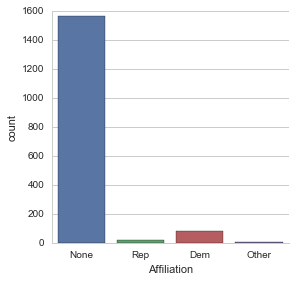

In [7]:
sns.factorplot('Affiliation',data=poll_df1,kind='count')

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

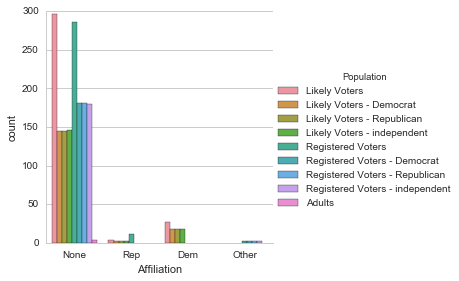

In [8]:
sns.factorplot('Affiliation',data=poll_df1,kind='count',hue='Population')

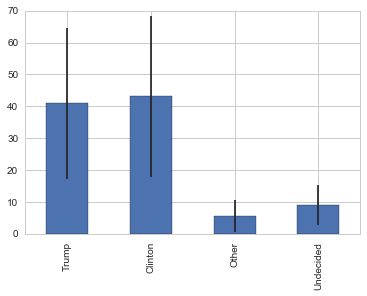

In [9]:
# First we'll get the average
avg = pd.DataFrame(poll_df1.mean())
avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

# After that let's get the error
std = pd.DataFrame(poll_df1.std())
std.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

avg.plot(yerr=std,kind='bar',legend=False)

In [10]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['average','std']
poll_avg

,average,std
Trump,40.984468,23.707190
Clinton,43.127240,25.363371
Other,5.584224,4.925900
Undecided,9.041224,6.252763


In [11]:
poll_df1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


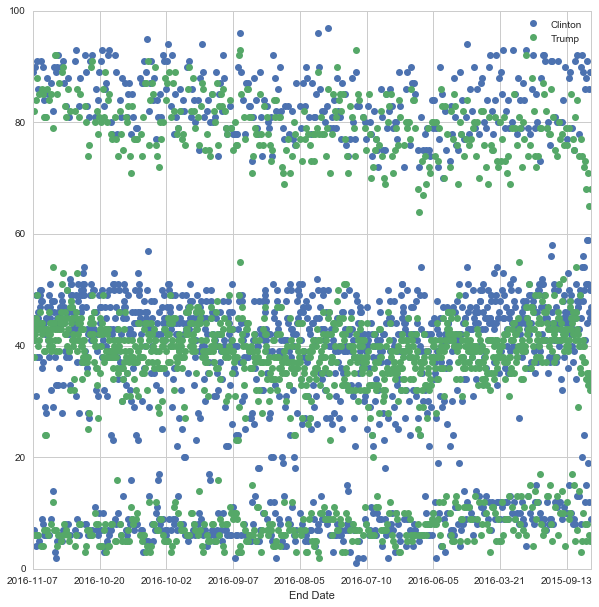

In [12]:
poll_df1.plot(x='End Date',y=['Clinton','Trump'],marker='o',linestyle='',figsize=(10,10))

In [13]:
# For timestamps
from datetime import datetime

In [14]:
poll_df1['Difference']=(poll_df1.Clinton-poll_df1.Trump)/100

poll_df1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


In [15]:
poll_df1 = poll_df1.groupby('Start Date',as_index=False).mean()
poll_df1.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


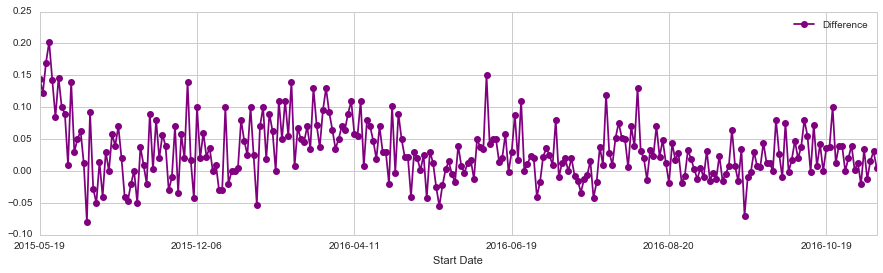

In [16]:
poll_df1.plot('Start Date','Difference',marker='o',figsize=(15,4),linestyle='-',color='purple')

In [17]:
row_in = 0
xlimit = []

for date in poll_df1['Start Date']:
    if date[0:7] == '2016-09' or date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
t1 = min(xlimit)
t2 = max(xlimit)

print t1
print t2

210
262


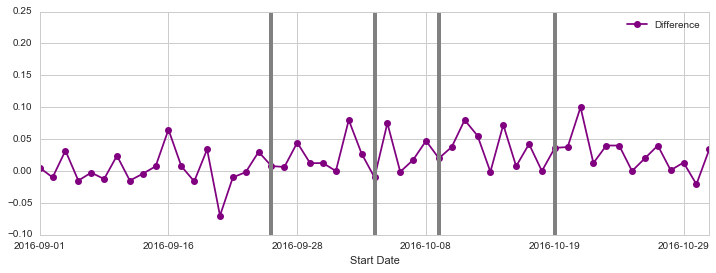

In [43]:
poll_df1.plot('Start Date','Difference',figsize=(12,4),linestyle='-',xlim=(t1,t2),marker='o',color='purple')

plt.axvline(x=212+16,linewidth=4,color='grey')
plt.axvline(x=212+24,linewidth=4,color='grey')
plt.axvline(x=212+29,linewidth=4,color='grey')
plt.axvline(x=212+38,linewidth=4,color='grey')

In [19]:
donor_df = pd.read_csv('Election_Donor_Data_2016.csv',low_memory=False)

In [20]:
donor_df = donor_df.drop('election_tp',axis=1)

In [21]:
donor_df.columns = ['cand_id','cand_nm','contbr_nm','contbr_city','contbr_st','contbr_zip','contbr_employer',
 'contbr_occupation','contb_receipt_amt','contb_receipt_dt','receipt_desc','memo_cd','memo_text','form_tp','file_num',
                    'tran_id','election_tp']

donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016


In [22]:
donor_df['contb_receipt_amt'].value_counts().head(10)

50.0     644916
25.0     594452
100.0    534181
10.0     431590
27.0     305148
15.0     268712
5.0      267379
250.0    179413
35.0     144035
20.0     104267
Name: contb_receipt_amt, dtype: int64

In [23]:
don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print "The average donated amount is %.2f with std of %.2f " %(don_mean,don_std)

The average donated amount is 126.30 with std of 7817.19 


In [24]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values(inplace=True)

top_donor.head(10)

C00577130   -93308.0
C00580100   -84236.8
C00575795   -20000.0
C00573519   -18100.0
C00574624   -16600.0
C00573519   -16300.0
C00574624   -13500.0
C00573519   -13000.0
C00573519   -12242.0
C00577130   -12000.0
Name: contb_receipt_amt, dtype: float64

In [25]:
top_donor = top_donor[top_donor>0]

top_donor.value_counts().head(20)

50.0      644916
25.0      594452
100.0     534181
10.0      431590
27.0      305148
15.0      268712
5.0       267379
250.0     179413
35.0      144035
20.0      104267
500.0      81018
2700.0     71386
40.0       69128
19.0       65823
200.0      61075
1000.0     58985
3.0        58201
28.0       53865
8.0        53689
75.0       49240
Name: contb_receipt_amt, dtype: int64

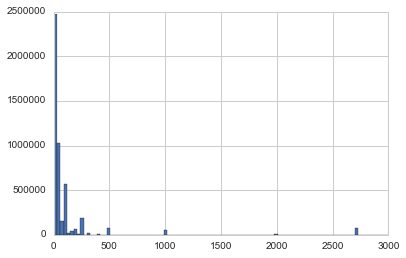

In [26]:
com_don = top_donor[top_donor<3000]

com_don.hist(bins=100)

In [27]:
donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016


In [28]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary'], dtype=object)

In [29]:
party_map = {'Lessig, Lawrence':'Democrat',
             'Clinton, Hillary Rodham':'Democrat',
             "O'Malley, Martin Joseph": 'Democrat',
             'Sanders, Bernard': 'Democrat',
             'Webb, James Henry Jr.': 'Democrat',
             'Rubio, Marco': 'Republican',
           'Santorum, Richard J.': 'Republican',
           'Perry, James R. (Rick)': 'Republican',
           'Carson, Benjamin S.': 'Republican',
           "Cruz, Rafael Edward 'Ted'": 'Republican',
           'Paul, Rand': 'Republican','Pataki, George E.': 'Republican',
           'Fiorina, Carly': 'Republican',
           'Huckabee, Mike': 'Republican',
           'Graham, Lindsey O.': 'Republican',
           'Bush, Jeb': 'Republican',
           'Trump, Donald J.': 'Republican',
            'Jindal, Bobby': 'Republican',
            'Christie, Christopher J.':'Republican',
            'Walker, Scott':'Republican',
            'Stein, Jill': 'Republican',
            'Kasich, John R.':'Republican',
            'Gilmore, James S III':'Republican',
            'Johnson, Gary':'Republican'}

donor_df['party'] = donor_df['cand_nm'].map(party_map)

donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016,Republican
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016,Republican
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016,Republican


In [30]:
donor_df = donor_df[donor_df.contb_receipt_amt>0]

donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016,Republican
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016,Republican
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016,Republican


In [31]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bush, Jeb                      28038
Carson, Benjamin S.           244904
Christie, Christopher J.        5836
Clinton, Hillary Rodham      1426644
Cruz, Rafael Edward 'Ted'     541088
Fiorina, Carly                 27536
Gilmore, James S III              79
Graham, Lindsey O.              3925
Huckabee, Mike                  6359
Jindal, Bobby                    761
Johnson, Gary                   2473
Kasich, John R.                25210
Lessig, Lawrence                1337
O'Malley, Martin Joseph         5194
Pataki, George E.                343
Paul, Rand                     32078
Perry, James R. (Rick)           875
Rubio, Marco                   99258
Sanders, Bernard             2045356
Santorum, Richard J.            1658
Stein, Jill                     2792
Trump, Donald J.              318681
Walker, Scott                   6436
Webb, James Henry Jr.            800
Name: contb_receipt_amt, dtype: int64

In [32]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bush, Jeb                    3.377373e+07
Carson, Benjamin S.          2.901400e+07
Christie, Christopher J.     8.213720e+06
Clinton, Hillary Rodham      2.869153e+08
Cruz, Rafael Edward 'Ted'    6.975275e+07
Fiorina, Carly               6.693845e+06
Gilmore, James S III         1.015107e+05
Graham, Lindsey O.           4.630162e+06
Huckabee, Mike               2.498978e+06
Jindal, Bobby                1.275393e+06
Johnson, Gary                1.243503e+06
Kasich, John R.              1.475258e+07
Lessig, Lawrence             6.242195e+05
O'Malley, Martin Joseph      4.057502e+06
Pataki, George E.            5.073494e+05
Paul, Rand                   6.271873e+06
Perry, James R. (Rick)       1.189868e+06
Rubio, Marco                 4.054158e+07
Sanders, Bernard             9.752034e+07
Santorum, Richard J.         1.130000e+06
Stein, Jill                  5.083337e+05
Trump, Donald J.             3.946628e+07
Walker, Scott                6.442345e+06
Webb, James Henry Jr.     

In [33]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print 'The candidate %s raised %.0f dollors ' %(cand_amount.index[i],don)
    print '\n'
    
    i += 1

The candidate Bush, Jeb raised 33773733 dollors 


The candidate Carson, Benjamin S. raised 29014000 dollors 


The candidate Christie, Christopher J. raised 8213720 dollors 


The candidate Clinton, Hillary Rodham raised 286915344 dollors 


The candidate Cruz, Rafael Edward 'Ted' raised 69752747 dollors 


The candidate Fiorina, Carly raised 6693845 dollors 


The candidate Gilmore, James S III raised 101511 dollors 


The candidate Graham, Lindsey O. raised 4630162 dollors 


The candidate Huckabee, Mike raised 2498978 dollors 


The candidate Jindal, Bobby raised 1275393 dollors 


The candidate Johnson, Gary raised 1243503 dollors 


The candidate Kasich, John R. raised 14752578 dollors 


The candidate Lessig, Lawrence raised 624220 dollors 


The candidate O'Malley, Martin Joseph raised 4057502 dollors 


The candidate Pataki, George E. raised 507349 dollors 


The candidate Paul, Rand raised 6271873 dollors 


The candidate Perry, James R. (Rick) raised 1189868 dollors 


The c

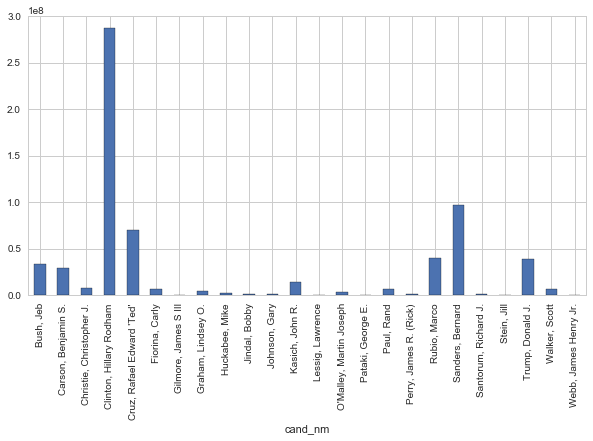

In [34]:
cand_amount.plot(kind='bar',figsize=(10,5))

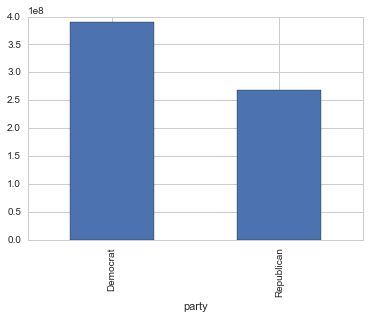

In [35]:
party_amount = donor_df.groupby('party')['contb_receipt_amt'].sum()

party_amount.plot(kind='bar')

In [36]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                       index='contbr_occupation',
                                       columns='party', aggfunc='sum')

occupation_df.head()

party,Democrat,Republican
contbr_occupation,,
ADMINISTRATIVE ASSISTANT,150.0,NaN
ARTIST,100.0,NaN
CAREER ADVISOR,50.0,NaN
CHARITY CONSULTANT,250.0,NaN
"CONSULTANT, BUSINESS OWNER",350.0,NaN


In [37]:
occupation_df.shape

(92921, 2)

In [38]:
occupation_df = occupation_df[occupation_df.sum(axis=1) > 1000000]

occupation_df.shape

(59, 2)

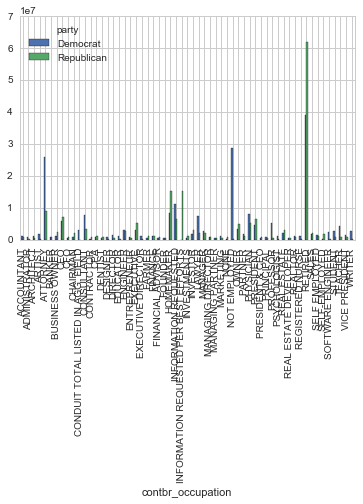

In [39]:
occupation_df.plot(kind='bar')

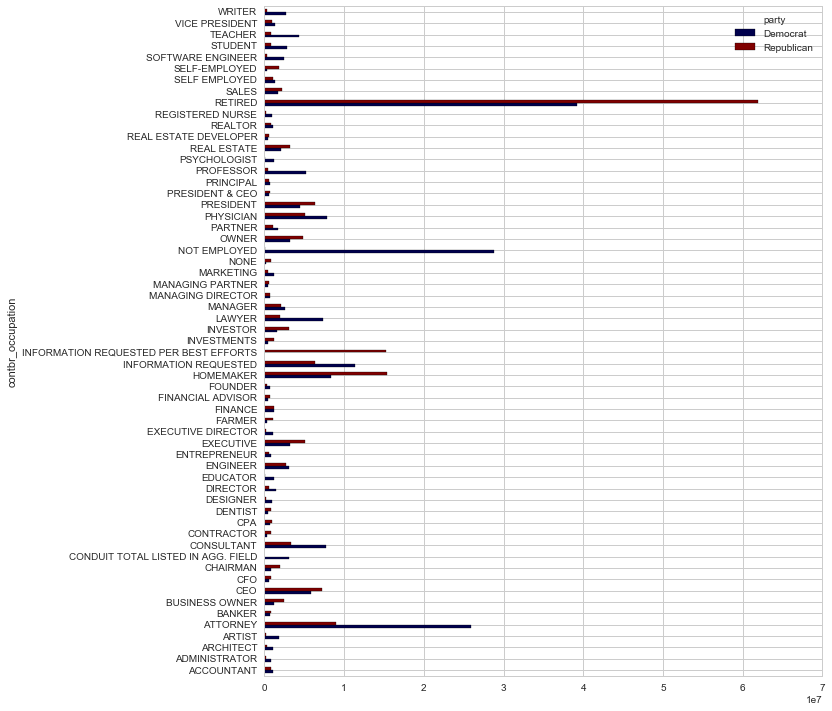

In [40]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [41]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED','NONE'],axis=0,inplace=True)

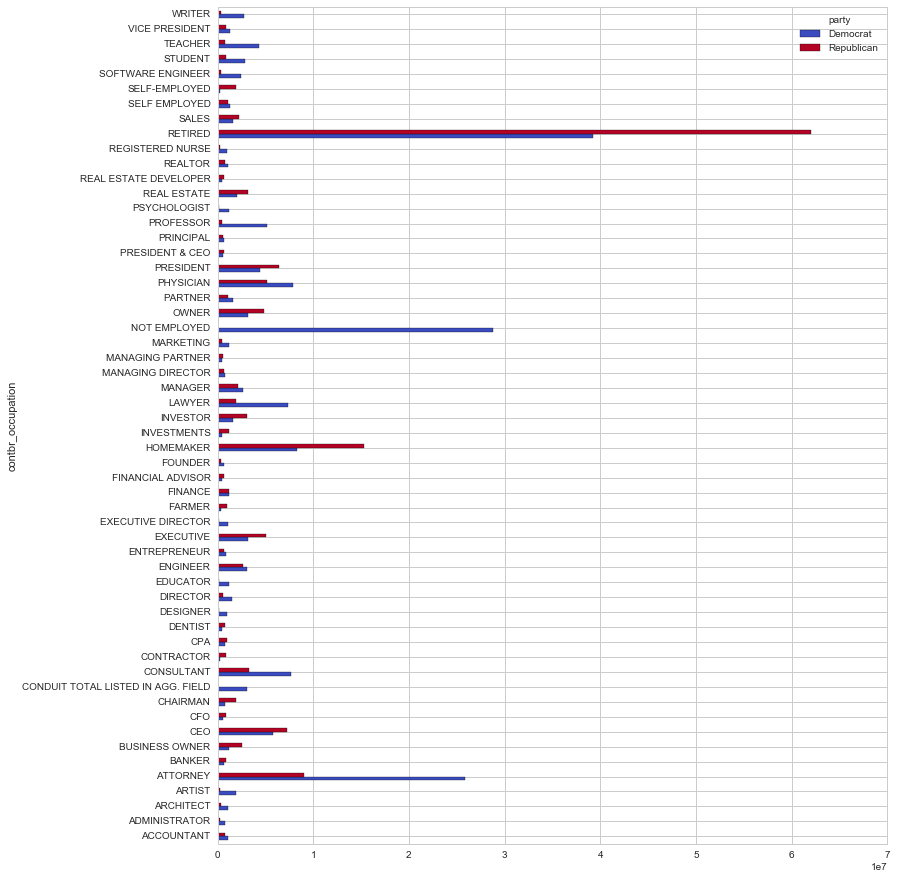

In [42]:
occupation_df.plot(kind='barh',figsize=(12,15),cmap='coolwarm')